<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Complete_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [5]:
df.shape

(19158, 13)

In [11]:
cols=[ var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
2730,0.624,no_enrollment,Masters,7.0,48.0
16013,0.682,Full time course,Graduate,3.0,13.0
5281,0.926,no_enrollment,Masters,18.0,61.0
7441,0.920,no_enrollment,Masters,16.0,292.0
7736,0.624,no_enrollment,Graduate,4.0,129.0


In [13]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [14]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

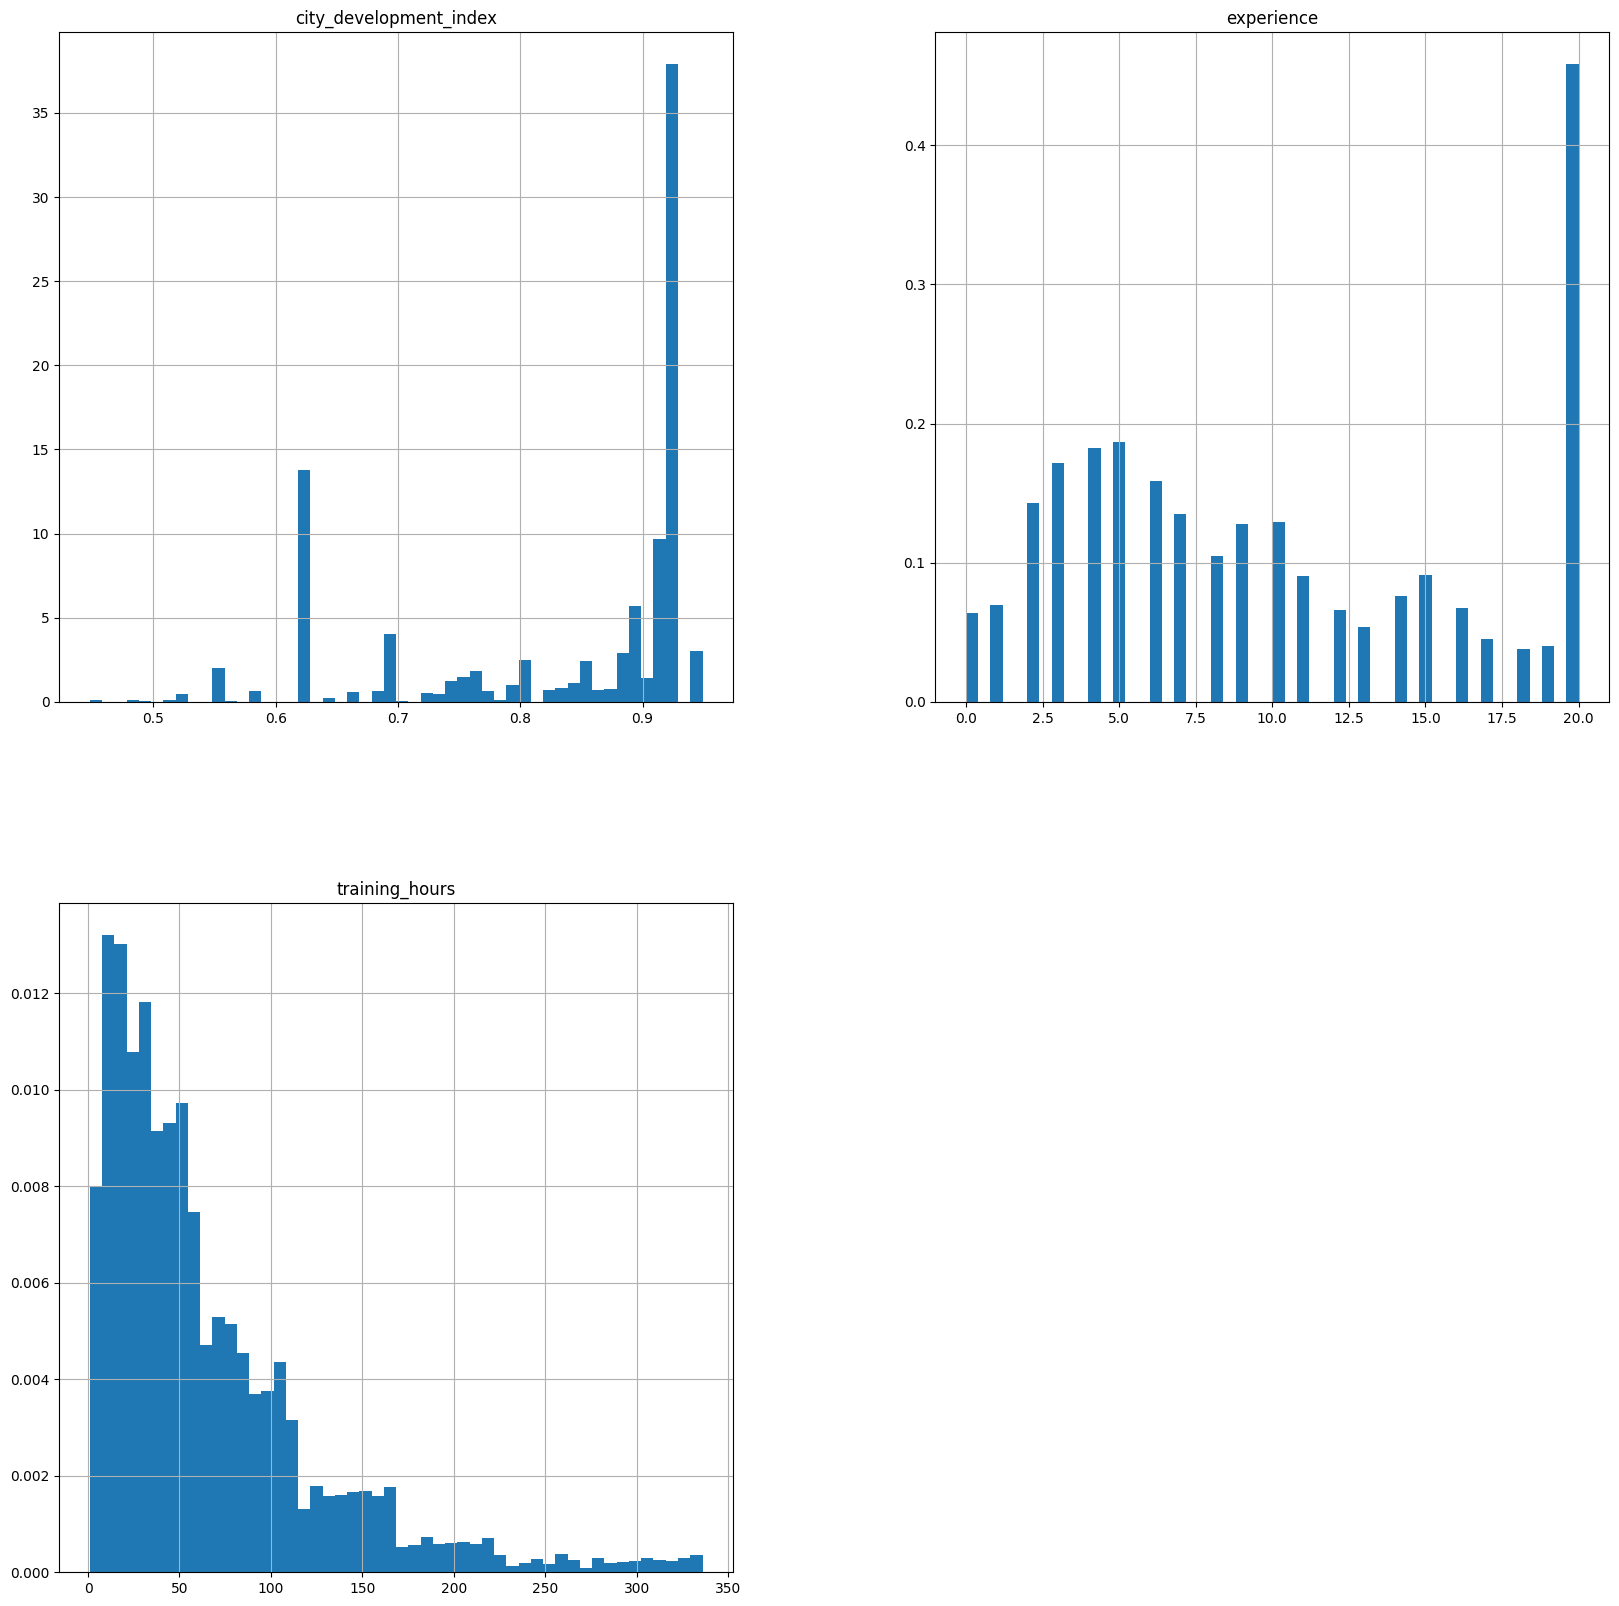

In [15]:
new_df.hist(figsize=(20,20),bins=50,density=True)
plt.show()

<Axes: >

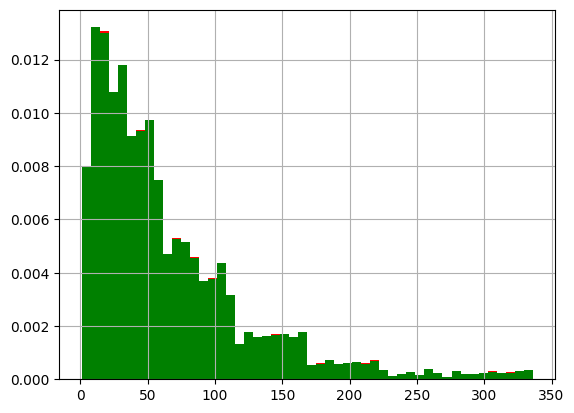

In [16]:
from matplotlib import color_sequences
fig=plt.figure()
ax=fig.add_subplot(111)

df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='green')


<Axes: ylabel='Density'>

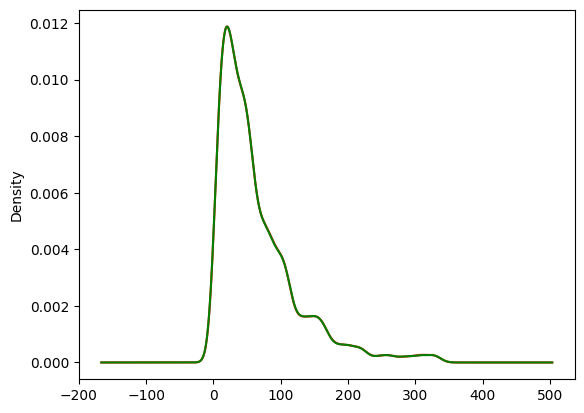

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['training_hours'].plot.density(color='red')

new_df['training_hours'].plot.density(color='green')

<Axes: >

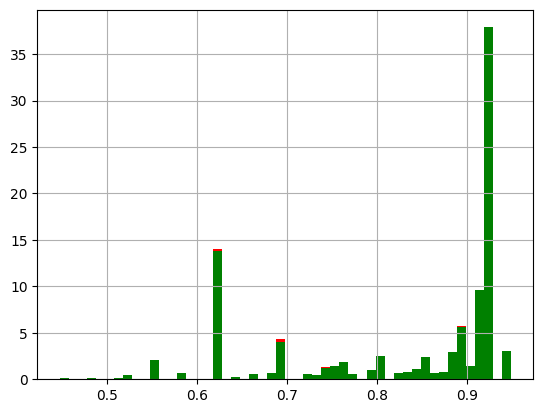

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')
new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='green')

<Axes: ylabel='Density'>

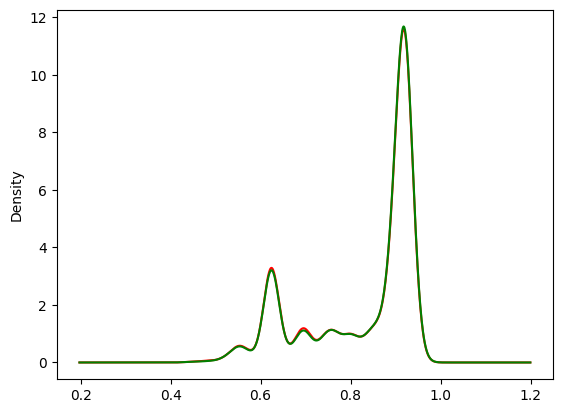

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')
new_df['city_development_index'].plot.density(color='green')

<Axes: >

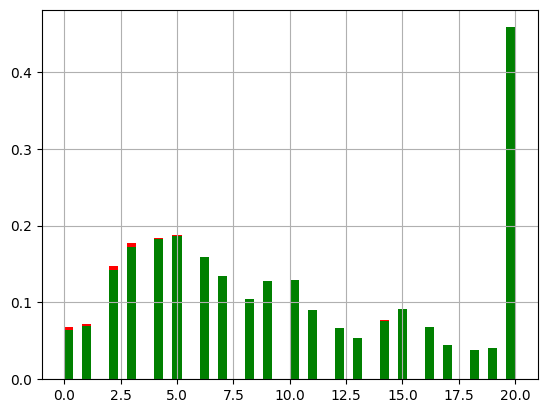

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['experience'].hist(bins=50,ax=ax,density=True,color='red')
new_df['experience'].hist(bins=50,ax=ax,density=True,color='green')

<Axes: ylabel='Density'>

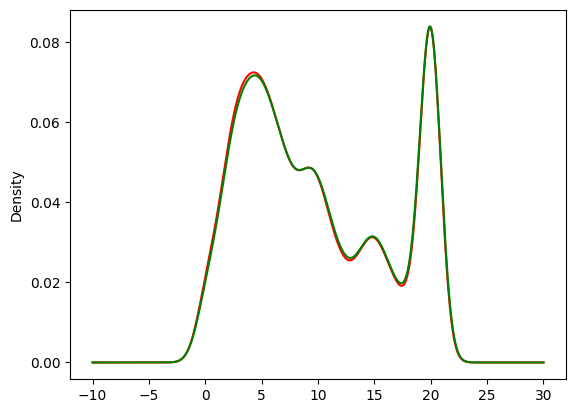

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='green')

In [25]:
temp=pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
],
               axis=1)

temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [26]:
temp=pd.concat([
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
],
               axis=1)

temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
